In [ ]:
Name: Anjing Dai
Email: and438@mail.harvard.edu

In [16]:
import pandas as pd
import numpy as np

In [51]:
import datetime

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline

#### A.Assemble a dataframe with one row per customer and the following columns:
    * customer_id
    * gender
    * most_recent_order_date
    * order_count (number of orders placed by this customer)
   Sort the dataframe by customer_id ascending and display the first 10 rows.


In [55]:
df=pd.read_csv("screening_exercise_orders_v201810.csv",index_col=False)

In [58]:
df["date"]=pd.to_datetime(df["date"])

In [59]:
df=df.sort_values(["customer_id","date"])

In [60]:
df_new=pd.DataFrame({"most_recent_order_date":df.groupby(["customer_id"])["date"].last(),\
                "order_count":df.groupby(["customer_id"])["customer_id"].count()})

In [61]:
df_new.reset_index(inplace=True)

In [62]:
df_output=pd.merge(df[["customer_id","gender"]].drop_duplicates(),df_new)

In [63]:
df_output.head(10)

,customer_id,gender,most_recent_order_date,order_count
0,1000,0,2017-01-01 00:11:31,1
1,1001,0,2017-01-01 00:29:56,1
2,1002,1,2017-02-19 21:35:31,3
3,1003,1,2017-04-26 02:37:20,4
4,1004,0,2017-01-01 03:11:54,1
5,1005,1,2017-12-16 01:39:27,2
6,1006,1,2017-05-09 15:27:20,3
7,1007,0,2017-01-01 15:59:50,1
8,1008,0,2017-12-17 05:47:48,3
9,1009,1,2017-01-01 19:27:17,1


### ---------------------------------------------------------------------------------------------------------------------------------------

#### B. Plot the count of orders per week.
#### Note: Totaled at the end of Sunday for each week.

In [74]:
df_output.index=df_output["most_recent_order_date"]

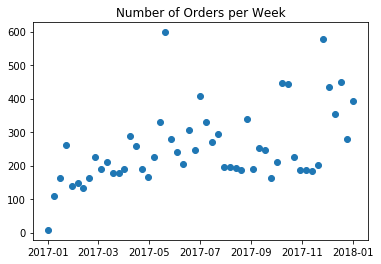

In [92]:
plt.plot(df_output["order_count"].resample("W").sum(),"o")
plt.title("Number of Orders per Week");

#### C) Compute the mean order value for gender 0 and for gender 1. Do you think the difference is significant?

In [94]:
df.groupby("gender")["value"].mean()

gender
0    363.890006
1    350.708361
Name: value, dtype: float64

In [98]:
from scipy import stats

In [100]:
stats.ttest_ind(df["value"][df.gender==0],df["value"][df.gender==1], equal_var = True)

Ttest_indResult(statistic=1.9757691572171103, pvalue=0.04820130539124126)

In [101]:
stats.ttest_ind(df["value"][df.gender==0],df["value"][df.gender==1], equal_var = False)

Ttest_indResult(statistic=1.976107933576883, pvalue=0.048162962951282126)

#### Anwer:
The different in mean order value is significantly different among two gender groups at 5% significance level assuming either the two group have the same variance or the two group have different variance.

#### D) Assuming a single gender prediction was made for each customer, generate a confusion matrix for predicted gender. Do not use a library function to do this. What does the confusion matrix tell you about the quality of the predictions?

In [111]:
gender_mx=np.zeros(shape=(2,2))

In [115]:
gender_mx[0,0]=np.sum(df[df.gender==0]["predicted_gender"]==0)
gender_mx[0,1]=np.sum(df[df.gender==0]["predicted_gender"]==1)
gender_mx[1,0]=np.sum(df[df.gender==1]["predicted_gender"]==0)
gender_mx[1,1]=np.sum(df[df.gender==1]["predicted_gender"]==1)

In [118]:
gender_mx


array([[3349., 3410.],
       [1463., 5249.]])

##### Note: true gender on the row, predicted on the column. order as 0,1.

In [125]:
predict_accuracy=(gender_mx[0,0]+gender_mx[1,1])/gender_mx.sum()
fpr=gender_mx[0,1]/np.sum(gender_mx,axis=1)[0]
fnr=gender_mx[1,0]/np.sum(gender_mx,axis=1)[1]

In [126]:
print("Prediction Accuracy: ",predict_accuracy)
print("False Positive rate: ",fpr)
print("False Negative rate: ",fnr)

Prediction Accuracy:  0.6382599658525722
False Positive rate:  0.504512501849386
False Negative rate:  0.2179678188319428


The prediction accuracy is 63.8% which is not much higher than a random guess for a binary classification.


#### E) Describe one of your favorite tools or techniques and give a small example of how it's helped you solve a problem. Limit your answer to one paragraph.

My favorite modeling tool is random forest. Its fundamental idea is decision tree, which is straightforward and easy to interpret. The ensemble of trees decreases the variance of the final model without increasing the bias. It is applicable to both regression problems and classification problems, supervised learning and unsupervised learning. There are many parameters that can be tuned in the model and feature engineering provides more space for the model to improve. With dataset of moderate scale, its performance is pretty good and often beats other complex models such as neural network. In a three-category-classification project for Alzheimer's diagonosis, it tuned out to be the best model after being optimized on depth of trees, number of trees, spliting metrics and gave us a 65% prediction accuracy.